In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint

In [23]:
def ajusta_bits_multiply(df):
    for index, row in df.iterrows():
        coluna_metodo = row['metodo']
        if 'multiply' in coluna_metodo:
            strs = coluna_metodo.split('_')
            num = int(strs[1])

            if num < 4:
                num = 4
            elif num < 8:
                num = 8
            else:
                num = 16
                
            df.loc[index, 'metodo'] = strs[0] + '_' + str(num) + '_' + strs[2]

In [24]:
df = pd.read_csv('dadosDividirEConquistar.csv')

df['tempo'] = df['tempo'].astype(int)
df['iteracoes'] = df['iteracoes'].astype(int)
ajusta_bits_multiply(df)

df['tempo(ms)'] = df['tempo']/1e6



In [25]:
df_mergeSort = df[df['metodo'].str.contains('mergeSort', na=False)]
df_maxVal1 = df[df['metodo'].str.contains('maxVal1', na=False)]
df_maxVal2 = df[df['metodo'].str.contains('maxVal2', na=False)]
df_multiply = df[df['metodo'].str.contains('multiply', na=False)]
df_multiply2 = df[df['metodo'].str.contains('multiply2', na=False)]


df_mergeSort = df_mergeSort.sort_values(by='iteracoes')
df_maxVal1 = df_maxVal1.sort_values(by='iteracoes')
df_maxVal2 = df_maxVal2.sort_values(by='iteracoes')
df_multiply = df_multiply.sort_values(by='iteracoes')
df_multiply2 = df_multiply2.sort_values(by='iteracoes')


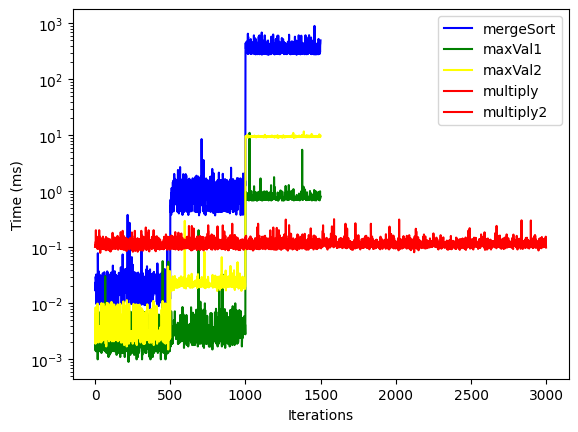

In [26]:
plt.plot(range(df_mergeSort.shape[0]), df_mergeSort['tempo(ms)'], color= 'blue')
plt.plot(range(df_maxVal1.shape[0]), df_maxVal1['tempo(ms)'], color= 'green')
plt.plot(range(df_maxVal2.shape[0]), df_maxVal2['tempo(ms)'], color= 'yellow')
plt.plot(range(df_multiply.shape[0]), df_multiply['tempo(ms)'], color= 'red')
plt.plot(range(df_multiply2.shape[0]), df_multiply2['tempo(ms)'], color= 'red')

plt.legend(['mergeSort', 'maxVal1', 'maxVal2', 'multiply', 'multiply2'])

plt.ylabel('Time (ms)')
plt.xlabel('Iterations')
plt.yscale('log')
plt.show()

In [27]:
mergeSort_32 = df[df['metodo'] == 'mergeSort_32_numeros']
mergeSort_2048 = df[df['metodo'] == 'mergeSort_2048_numeros']
mergeSort_1048576 = df[df['metodo'] == 'mergeSort_1048576_numeros']

media_merge_32 = mergeSort_32['tempo(ms)'].mean()
media_merge_2048 = mergeSort_2048['tempo(ms)'].mean()
media_merge_1048576 = mergeSort_1048576['tempo(ms)'].mean()

maxVal1_32 = df[df['metodo'] == 'maxVal1_32_numeros']
maxVal1_2048 = df[df['metodo'] == 'maxVal1_2048_numeros']
maxVal1_1048576 = df[df['metodo'] == 'maxVal1_1048576_numeros']

media_maxVal1_32 = maxVal1_32['tempo(ms)'].mean()
media_maxVal1_2048 = maxVal1_2048['tempo(ms)'].mean()
media_maxVal1_1048576 = maxVal1_1048576['tempo(ms)'].mean()


maxVal2_32 = df[df['metodo'] == 'maxVal2_32_numeros']
maxVal2_2048 = df[df['metodo'] == 'maxVal2_2048_numeros']
maxVal2_1048576 = df[df['metodo'] == 'maxVal2_1048576_numeros']

media_maxVal2_32 = maxVal2_32['tempo(ms)'].mean()
media_maxVal2_2048 = maxVal2_2048['tempo(ms)'].mean()
media_maxVal2_1048576 = maxVal2_1048576['tempo(ms)'].mean()


multiply_4 = df[df['metodo'] == 'multiply_4_bits']
multiply_8 = df[df['metodo'] == 'multiply_8_bits']
multiply_16 = df[df['metodo'] == 'multiply_16_bits']

media_multiply_4 = multiply_4['tempo(ms)'].mean()
media_multiply_8 = multiply_8['tempo(ms)'].mean()
media_multiply_16 = multiply_16['tempo(ms)'].mean()

multiply2_4 = df[df['metodo'] == 'multiply2_4_bits']
multiply2_8 = df[df['metodo'] == 'multiply2_8_bits']
multiply2_16 = df[df['metodo'] == 'multiply2_16_bits']

media_multiply2_4 = multiply2_4['tempo(ms)'].mean()
media_multiply2_8 = multiply2_8['tempo(ms)'].mean()
media_multiply2_16 = multiply2_16['tempo(ms)'].mean()

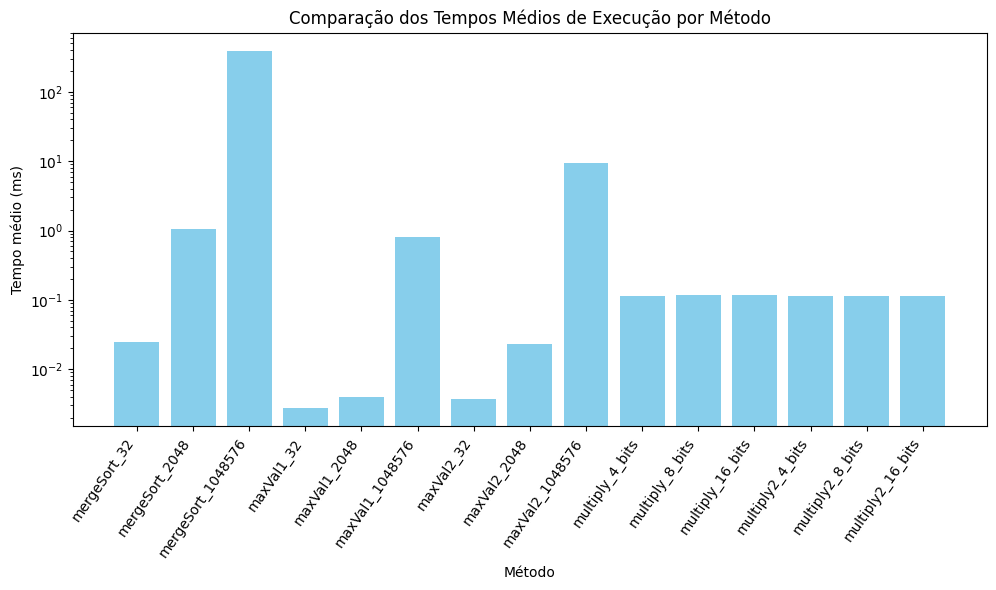

In [28]:
metodos = ['mergeSort_32', 'mergeSort_2048', 'mergeSort_1048576',
           'maxVal1_32', 'maxVal1_2048', 'maxVal1_1048576',
           'maxVal2_32', 'maxVal2_2048', 'maxVal2_1048576',
           'multiply_4_bits', 'multiply_8_bits', 'multiply_16_bits',
           'multiply2_4_bits', 'multiply2_8_bits', 'multiply2_16_bits']

tempos_medios = [media_merge_32, media_merge_2048, media_merge_1048576,
                 media_maxVal1_32, media_maxVal1_2048, media_maxVal1_1048576,
                 media_maxVal2_32, media_maxVal2_2048, media_maxVal2_1048576,
                 media_multiply_4, media_multiply_8, media_multiply_16,
                 media_multiply2_4, media_multiply2_8, media_multiply2_16]

plt.figure(figsize=(10, 6))
plt.bar(metodos, tempos_medios, color='skyblue')
plt.xlabel('Método')
plt.ylabel('Tempo médio (ms)')
plt.title('Comparação dos Tempos Médios de Execução por Método')
plt.xticks(rotation=55, ha='right')
plt.tight_layout()
plt.yscale('log')
plt.show()
